## 实验八 Pandas数据分析及应用

###   实验目的：
pandas官网：http://pandas.pydata.org

1. 掌握Pandas的Series和DataFrame的创建
2. 掌握Pandas的Series和DataFrame的数据选择
3. 掌握DataFrame对文件的读取和导出
4. 掌握DaTaFrame 数据的排序、分组、合并等操作


### 实验内容

导入numpy和pandas库

In [2]:
import numpy as np
import pandas as pd

### 1. 创建Series对象,   语法格式：s=pd.Series(data,index),data可以是如下的数据


- list   列表  
- a Python dict  字典
- an ndarray  数组
- a scalar value (like 5)  标量



(1) 创建Series

In [2]:
data=[89,90,78,87,97]
s1=pd.Series(data)
s1

0    89
1    90
2    78
3    87
4    97
dtype: int64

In [3]:
s1 = pd.Series(data,index=['A','B','C','D','E'])#指定字符串类型索引为;'A','B','C','D','E'
s1

A    89
B    90
C    78
D    87
E    97
dtype: int64

 (2)Series的索引与访问
访问Series里的数据方式，采用标签索引（显示索引）和整数型索引（隐式索引）

In [4]:
s3=pd.Series(data=[89,90,78,87,97],index=['语文','数学','英语','物理','化学'])
s3

语文    89
数学    90
英语    78
物理    87
化学    97
dtype: int64

In [5]:
#采用标签索引（显示索引）和整数型索引（隐式索引）输出s3中语文成绩
s3['语文']

np.int64(89)

(3)对Series进行算术运算操作
- Series将根据索引index,对相应的数据进行计算。
- Series在运算中会自动对齐不同索引的数据,Series会寻找匹配的index值进行运算，如果在两Series中找不到相同的index,，则返回一个空值NaN。

In [6]:
s4=pd.Series([10,20,30,10],index=list("abcd"))
s5=pd.Series(np.arange(3),index=list('abc'))
display(s4,s5)

a    10
b    20
c    30
d    10
dtype: int64

a    0
b    1
c    2
dtype: int64

In [7]:
# s4和s5进行加法运算，观察运行结果
s6 = s4+s5
s6


a    10.0
b    21.0
c    32.0
d     NaN
dtype: float64

### 2、DataFrames对象的创建
- DataFrame这种数据结构我们可以把它看作是一张二维表，DataFrame的列标签称为columns，行标签称为index
- DataFrame创建语法格式：pd.DataFrame(data,index,columns)
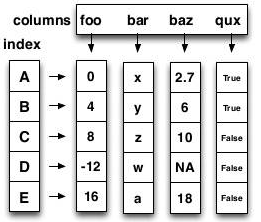

 (1)创建上图所示的DataFrame对象df1


In [8]:
df1 = pd.DataFrame(np.arange(20).reshape(5,4),index = ['A','B','C','D','E'],columns=['foo','bar','baz','qux'])
df1


,foo,bar,baz,qux
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11
D,12,13,14,15
E,16,17,18,19


(2)以字典d创建DataFrame对象df2
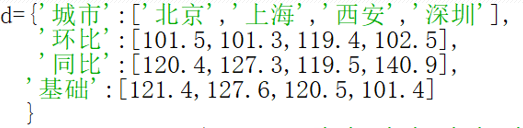

In [13]:
df2={'城市':['北京','上海','西安','深圳'],'环比':[101.5,101.3,119.4,102.5],'同比':[12-.4,127.3,119.5,140.9],'基础':[121.4,127.6,120.5,101.4]}
df2 = pd.DataFrame(df2)
df2

,城市,环比,同比,基础
0,北京,101.5,11.6,121.4
1,上海,101.3,127.3,127.6
2,西安,119.4,119.5,120.5
3,深圳,102.5,140.9,101.4


In [14]:
# 设置df2行索引index为'A','B','C','D'。
df2.index = ['A','B','C','D']
df2

,城市,环比,同比,基础
A,北京,101.5,11.6,121.4
B,上海,101.3,127.3,127.6
C,西安,119.4,119.5,120.5
D,深圳,102.5,140.9,101.4


In [15]:
# 使用set_index()将'城市'列设置为新索引
df2 = df2.set_index('城市')
df2

,环比,同比,基础
城市,,,
北京,101.5,11.6,121.4
上海,101.3,127.3,127.6
西安,119.4,119.5,120.5
深圳,102.5,140.9,101.4


(3) 从numpy 数组创建一个DataFrame
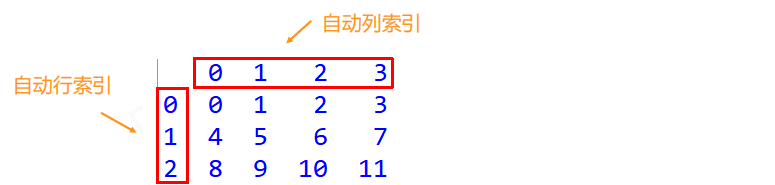

In [16]:
# 创建上图所示的DataFrame对象df3

df3=pd.DataFrame(np.arange(12).reshape(3,4))
df3

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [17]:
# 设置df3的行索引['a','b','c']，列索引为['A','B','C','D'] 
df3.columns = ['A','B','C','D']
df3.index = ['a','b','c']
df3


,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [22]:
# 创建行索引为‘学生1~学生5’，列索引为‘语文、数学’等5门课名称，学生成绩由随机生成60-100之间随机整数组成的DataFram对象df4.
df4 = pd.DataFrame(np.random.randint(60,101,size=(5,5)).reshape(5,5),index = ['学生1','学生2','学生3','学生4','学生5'],columns=['语文','数学','英语','地理','科学'])
df4

,语文,数学,英语,地理,科学
学生1,84,71,85,83,87
学生2,80,79,71,86,66
学生3,93,73,62,68,89
学生4,81,91,68,98,80
学生5,84,88,74,81,85


In [19]:
# 创建行索引为时间序列，列索引为‘ABCDEF',data数据为标准正态分布的随机数组成的DataFrame对象df5.
# 设置随机数种子以获得可重复的结果
np.random.seed(0)
df = pd.DataFrame(np.random.randn(10, 6), index= pd.date_range(start='2023-01-01', periods=10, freq='D'), columns=list('ABCDEF'))
df


,A,B,C,D,E,F
2023-01-01,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278
2023-01-02,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274
2023-01-03,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158
2023-01-04,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165
2023-01-05,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359
2023-01-06,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349
2023-01-07,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018
2023-01-08,-1.706270,1.950775,-0.509652,-0.438074,-1.252795,0.777490
2023-01-09,-1.613898,-0.212740,-0.895467,0.386902,-0.510805,-1.180632
2023-01-10,-0.028182,0.428332,0.066517,0.302472,-0.634322,-0.362741


### 3. DataFrame属性和方法 
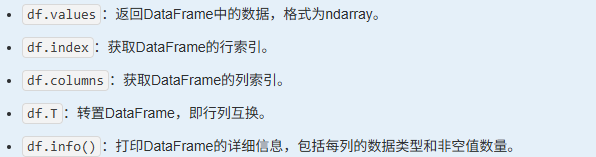

In [23]:
#查看df1的行索引
df1.index


Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [24]:
#查看df1的行索引
df1.columns


Index(['foo', 'bar', 'baz', 'qux'], dtype='object')

In [25]:
#查看df1的数据及其形状
df1.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [26]:
#转置df1
df1.T


,A,B,C,D,E
foo,0,4,8,12,16
bar,1,5,9,13,17
baz,2,6,10,14,18
qux,3,7,11,15,19


### 4. DataFrame数据选择


#### （1）选择列
- 用户可以使用**列名**选择一个或多个列。方括号中为 **['列名字符串']**
- 当用户选择单列时可使用单括号，如 **df['name']**; 
- 选择多列时使用双括号，如 **df[['name','age']]** 。这是因为在选择多列时，实际上是向 DataFrame 传递了一个列表，而列表需要用括号进行定义。
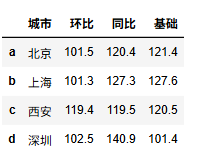

In [28]:
#创建上述的DataFrame对象df,从df中选取'城市'列
df2={'城市':['北京','上海','西安','深圳'],'环比':[101.5,101.3,119.4,102.5],'同比':[120.4,127.3,119.5,140.9],'基础':[121.4,127.6,120.5,101.4]}
df2 = pd.DataFrame(df2)
df2.index = ['a','b','c','d']
print(df2)
df2['城市']

   城市     环比     同比     基础
a  北京  101.5  120.4  121.4
b  上海  101.3  127.3  127.6
c  西安  119.4  119.5  120.5
d  深圳  102.5  140.9  101.4


a    北京
b    上海
c    西安
d    深圳
Name: 城市, dtype: object

In [29]:
#选取'城市'和'同比'两列
df2[['城市','同比']]

,城市,同比
a,北京,120.4
b,上海,127.3
c,西安,119.5
d,深圳,140.9


#### （2）选择行
- 使用[ ]，区别于选取列，此种方式[ ]中不再单独的传入一个字符串，而是需要使用 **冒号切片**，选择连续行。



In [30]:
 #通过默认整数索引位置选择df中前两行
df2[0:2]

,城市,环比,同比,基础
a,北京,101.5,120.4,121.4
b,上海,101.3,127.3,127.6


In [31]:
#通过标签索引索选择前两行
df2['a':'b']

,城市,环比,同比,基础
a,北京,101.5,120.4,121.4
b,上海,101.3,127.3,127.6


- 使用.loc和.iloc属性选择行，区别就是.loc[]是根据行索引的标签值来选取数据，而.iloc[]是根据从0开始的整数下标位置来进行索引的。
  df.loc[] 括号中是"**标签**"字符串
  df.iloc[] 括号中是**整数**

In [38]:
#使用.loc和.iloc属性选择df 中第一行

print(df2.iloc[0])
df2.loc['a']

城市       北京
环比    101.5
同比    120.4
基础    121.4
Name: a, dtype: object


城市       北京
环比    101.5
同比    120.4
基础    121.4
Name: a, dtype: object

In [37]:
#使用.loc和.iloc属性选择df 中前两行
print(df2.loc[['a','b']])
df2.iloc[0:2]

   城市     环比     同比     基础
a  北京  101.5  120.4  121.4
b  上海  101.3  127.3  127.6


,城市,环比,同比,基础
a,北京,101.5,120.4,121.4
b,上海,101.3,127.3,127.6


In [46]:
#使用.loc和.iloc属性选择df中第一行和最后一行

print(df2.iloc[[0,-1]])
df2.loc[['a','d']]

   城市     环比     同比     基础
a  北京  101.5  120.4  121.4
d  深圳  102.5  140.9  101.4


,城市,环比,同比,基础
a,北京,101.5,120.4,121.4
d,深圳,102.5,140.9,101.4


#### (3) 选择区域
到目前位置，选取数据时都只传入了一个维度的参数。既然有了行索引和列索引两个维度，就可以把它们组合起来使用。


- 取所有行，某列，括号中的符符号[  ：，   ]

In [47]:
# 使用.loc和.iloc属性选择df所有行，'城市'列
print(df2.loc[:,'城市'])
df2.iloc[:,0]

a    北京
b    上海
c    西安
d    深圳
Name: 城市, dtype: object


a    北京
b    上海
c    西安
d    深圳
Name: 城市, dtype: object

In [50]:
#  使用.loc和.iloc属性取所有行，不连续多列
print(df2.loc[:, ['城市', '同比']])
df2.iloc[:,[0,2]]

   城市     同比
a  北京  120.4
b  上海  127.3
c  西安  119.5
d  深圳  140.9


,城市,同比
a,北京,120.4
b,上海,127.3
c,西安,119.5
d,深圳,140.9


In [62]:
#  使用.loc和.iloc属性取所有行，前三列
print(df2.loc[:,['城市','同比','环比']])
df2.iloc[:,[0,1,2]]

   城市     同比     环比
a  北京  120.4  101.5
b  上海  127.3  101.3
c  西安  119.5  119.4
d  深圳  140.9  102.5


,城市,环比,同比
a,北京,101.5,120.4
b,上海,101.3,127.3
c,西安,119.4,119.5
d,深圳,102.5,140.9



- 取某行，所有列，括号中的符号[ ，：   ]

In [3]:
df = pd.DataFrame(np.arange(1,21).reshape(4,5),index=list('abcd'))
print(df)
# 使用.loc和.iloc取df中'a','c'两行的所有列
print(df.loc[['a','c'],:])
print(df.iloc[[0,2],:])

    0   1   2   3   4
a   1   2   3   4   5
b   6   7   8   9  10
c  11  12  13  14  15
d  16  17  18  19  20
    0   1   2   3   4
a   1   2   3   4   5
c  11  12  13  14  15
    0   1   2   3   4
a   1   2   3   4   5
c  11  12  13  14  15


In [4]:
# 使用.loc和.iloc取df中前三行，所有列
print(df.loc[['a','b','c'],:])
print(df.iloc[0:3,:])

    0   1   2   3   4
a   1   2   3   4   5
b   6   7   8   9  10
c  11  12  13  14  15
    0   1   2   3   4
a   1   2   3   4   5
b   6   7   8   9  10
c  11  12  13  14  15


- 取某行，某列

In [5]:
#使用.loc和.iloc取df中取前三行，第2到3列
print(df.loc[['a','b','c'],2:3])
print(df.iloc[0:3,2:4])

    2   3
a   3   4
b   8   9
c  13  14
    2   3
a   3   4
b   8   9
c  13  14


In [6]:
#取第2和第4行，前两列
print(df.loc[['b','d'],[1,2]])
print(df.iloc[[1,3],1:3])

    1   2
b   7   8
d  17  18
    1   2
b   7   8
d  17  18


####  (4) 数据过滤
用户可以使用布尔表达式过滤数据：对指定列设置条件，
 & 表示且，| 表示 或，~ 表示非 
 例如：print(df[df['age'] > 30])   选择年龄大于 30 的所有行

In [103]:
# 在df中选择‘同比’大于120的所有行
print(df2[df2['同比']>120])

   城市     环比     同比     基础
a  北京  101.5  120.4  121.4
b  上海  101.3  127.3  127.6
d  深圳  102.5  140.9  101.4


In [107]:
# 在df中选择‘同比’大于120且‘环比’大于102的所有行
print(df2[(df2['同比']>120)&(df2['环比']>102)])

   城市     环比     同比     基础
d  深圳  102.5  140.9  101.4


### 5.数据文件的读取和导出
- 从 CSV、Excel、SQL 数据库等不同数据源读取数据到Pandas的DataFrame对象。
- 将处理后的数据导出为 CSV、Excel 等格式。
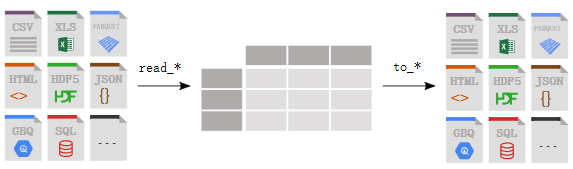

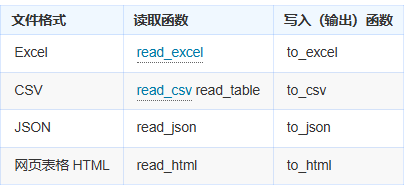
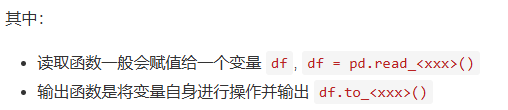

（1）导入文本文件：pd.read_csv()读入'nba.csv'文件

In [115]:
# ./表示当前目录,./data 表示当前目录下面的data文件夹
df = pd.read_csv('nba.csv')
print(df)

              Name            Team  Number Position   Age Height  Weight  \
0    Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1      Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2     John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3      R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4    Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   
..             ...             ...     ...      ...   ...    ...     ...   
453   Shelvin Mack       Utah Jazz     8.0       PG  26.0    6-3   203.0   
454      Raul Neto       Utah Jazz    25.0       PG  24.0    6-1   179.0   
455   Tibor Pleiss       Utah Jazz    21.0        C  26.0    7-3   256.0   
456    Jeff Withey       Utah Jazz    24.0        C  26.0    7-0   231.0   
457            NaN             NaN     NaN      NaN   NaN    NaN     NaN   

               College     Salary  
0                Texas  7730337.0  
1            Ma

(2)数据查看与处理：head()、tail()、info()、describe() 等方法。

In [116]:
#查看前5行
print(df.head(5))

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [117]:
#查看后5行
print(df.tail(5))

             Name       Team  Number Position   Age Height  Weight College  \
453  Shelvin Mack  Utah Jazz     8.0       PG  26.0    6-3   203.0  Butler   
454     Raul Neto  Utah Jazz    25.0       PG  24.0    6-1   179.0     NaN   
455  Tibor Pleiss  Utah Jazz    21.0        C  26.0    7-3   256.0     NaN   
456   Jeff Withey  Utah Jazz    24.0        C  26.0    7-0   231.0  Kansas   
457           NaN        NaN     NaN      NaN   NaN    NaN     NaN     NaN   

        Salary  
453  2433333.0  
454   900000.0  
455  2900000.0  
456   947276.0  
457        NaN  


In [118]:
#查看基本信息,了解数据是否有缺失，各列的数据类型，占用内存字节数等
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB
None


In [119]:
#查看每列的描述统计信息，了解均值，方差，最小值，最大值，1/4分位等信息
print(df.describe())

           Number         Age      Weight        Salary
count  457.000000  457.000000  457.000000  4.460000e+02
mean    17.678337   26.938731  221.522976  4.842684e+06
std     15.966090    4.404016   26.368343  5.229238e+06
min      0.000000   19.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  200.000000  1.044792e+06
50%     13.000000   26.000000  220.000000  2.839073e+06
75%     25.000000   30.000000  240.000000  6.500000e+06
max     99.000000   40.000000  307.000000  2.500000e+07


In [128]:
#Pandas 提供了许多统计函数，如 mean()、median()、min()、max()。计算'weight' 列的平均值和 age 列的最大值
print(df['Weight'].mean())
print(df['Age'].max())

221.52297592997812
40.0


In [138]:
#在nba.csv中,统计得分最高的前10个球员的名字是哪些？(先排序)
df = df.sort_values(by='Number',ascending=False)
print(df['Name'].head(10))

1              Jae Crowder
68          Lucas Nogueira
372            Drew Gooden
5             Amir Johnson
398        Nemanja Bjelica
391      Joffrey Lauvergne
222    Johnny O'Bryant III
75            Delon Wright
161          E'Twaun Moore
359       Brandon Jennings
Name: Name, dtype: object


(3)导入Excel文件：pd.read_excel()读入team.xlsx

In [142]:
df = pd.read_excel('team.xlsx')
df

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86
...,...,...,...,...,...,...
95,Gabriel,C,48,59,87,74
96,Austin7,C,21,31,30,43
97,Lincoln4,C,98,93,1,20
98,Eli,E,11,74,58,91


(4)导出DataFrame 
- 使用to_csv方法可以将DataFrame导出为CSV文件
- 使用to_excel方法可以将DataFrame导出为Excel文件
- 使用to_csv方法并指定分隔符为\t可以将DataFrame导出为TXT文件

In [143]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'City': ['New York', 'London', 'Paris']
       }
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,22,Paris


In [145]:
#将df导出到CSV文件,文件名为自己的学号姓名，不导出
df.to_csv('202318084045.csv')

In [146]:
#将df导出到Excel文件,文件名为自己的学号姓名
df.to_excel('202318084045.xlsx')

In [148]:
#将df导出到TXT文件，文件名为自己的学号姓名
df.to_csv('lxl.txt',decimal='\t')

注意事项
索引：默认情况下，Pandas会导出索引列。通过设置index=False来避免导出索引。
分隔符：对于TXT文件，可以通过设置sep='\t'来指定分隔符。

### 6. 数据排序
排序：sort_values()、sort_index()。

- 按索引排序,sort_index()
- 按值排序,sort_values(by,ascending)


In [149]:
df=pd.read_excel('team.xlsx',sheet_name=0)
df

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86
...,...,...,...,...,...,...
95,Gabriel,C,48,59,87,74
96,Austin7,C,21,31,30,43
97,Lincoln4,C,98,93,1,20
98,Eli,E,11,74,58,91


In [150]:
# 按行索引排序 
df.sort_index()

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86
...,...,...,...,...,...,...
95,Gabriel,C,48,59,87,74
96,Austin7,C,21,31,30,43
97,Lincoln4,C,98,93,1,20
98,Eli,E,11,74,58,91


In [151]:
# 按指定'Q1'一列排序
df.sort_values(by='Q1')

,name,team,Q1,Q2,Q3,Q4
37,Sebastian,C,1,14,68,48
39,Harley,B,2,99,12,13
85,Liam,B,2,80,24,25
58,Lewis,B,4,34,77,28
82,Finn,E,4,1,55,32
...,...,...,...,...,...,...
3,Eorge,C,93,96,71,78
88,Aaron,A,96,75,55,8
19,Max,E,97,75,41,3
38,Elijah,B,97,89,15,46


In [152]:
# 按'team','Q1'两列排序
df.sort_values(by=['team','Q1'])

,name,team,Q1,Q2,Q3,Q4
7,Lfie,A,9,10,99,37
51,Hugo0,A,28,25,14,71
34,Reggie1,A,30,12,23,9
22,Arthur,A,44,53,42,40
40,Toby,A,52,27,17,68
...,...,...,...,...,...,...
24,Isaac,E,74,23,28,65
36,Jaxon,E,88,98,19,98
0,Liver,E,89,21,24,64
80,Ryan,E,92,70,64,31


In [154]:
# 按指定'team','Q1'列原地排序
df.sort_values(by=['team','Q1'],inplace=True)
df

,name,team,Q1,Q2,Q3,Q4
7,Lfie,A,9,10,99,37
51,Hugo0,A,28,25,14,71
34,Reggie1,A,30,12,23,9
22,Arthur,A,44,53,42,40
40,Toby,A,52,27,17,68
...,...,...,...,...,...,...
24,Isaac,E,74,23,28,65
36,Jaxon,E,88,98,19,98
0,Liver,E,89,21,24,64
80,Ryan,E,92,70,64,31


### 7. 数据分组聚合
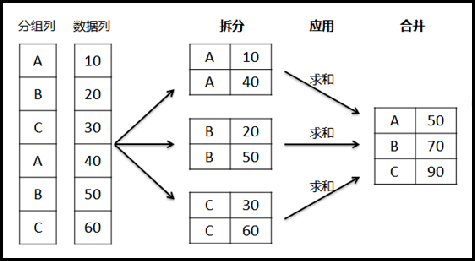

In [155]:
dic = {
    '省份': ['广东', '广东', '江苏', '浙江', '江苏', '浙江'],
    '城市': ['深圳', '广州', '苏州', '杭州', '南京', '宁波'],
    'GDP': [22286, 21500, 17319, 12556, 11715, 9846],
    '人口': [1090, 1404, 1065, 919, 827, 788],
}
df=pd.DataFrame(dic)
df

,省份,城市,GDP,人口
0,广东,深圳,22286,1090
1,广东,广州,21500,1404
2,江苏,苏州,17319,1065
3,浙江,杭州,12556,919
4,江苏,南京,11715,827
5,浙江,宁波,9846,788


In [156]:
# 取df对象中的第一、第三和第四列数据,组成dft对象
dft=df.iloc[:,[0,2,3]]
dft

,省份,GDP,人口
0,广东,22286,1090
1,广东,21500,1404
2,江苏,17319,1065
3,浙江,12556,919
4,江苏,11715,827
5,浙江,9846,788


In [157]:
#将dft中数据按 “省份 “分组,
dft.groupby('省份')
dft

,省份,GDP,人口
0,广东,22286,1090
1,广东,21500,1404
2,江苏,17319,1065
3,浙江,12556,919
4,江苏,11715,827
5,浙江,9846,788


In [161]:
#对各省分组后的“GDP”和“人口”求平均。
print(dft['人口'].mean())
print(dft['GDP'].mean())

1015.5
15870.333333333334


In [163]:
# 对各省“GDP”和“人口”求和。
print(dft['人口'].sum())
print(dft['GDP'].sum())

6093
95222


In [165]:
# 对各省“GDP”和“人口”求最大。
print(dft['人口'].max())
print(dft['GDP'].max())

1404
22286


In [167]:
#各省人均GDP值，精确到2位小数
grouped = dft.groupby('省份').agg({
    'GDP': 'sum',
    '人口': 'sum'
})

# 2. 计算人均GDP（注意单位转换：亿元/万人 = 元/人）
grouped['人均GDP（元）'] = (grouped['GDP'] * 10000) / grouped['人口']  # GDP转万元，人口单位为万人

# 3. 保留两位小数
grouped['人均GDP（元）'] = grouped['人均GDP（元）'].round(2)

# 4. 打印结果
print(grouped[['人均GDP（元）']])

     人均GDP（元）
省份           
广东  175565.36
江苏  153456.66
浙江  131236.09


###  8.Pandas数据合并
Pandas 提供 merge() 和 concat() 这两种数据合并的方法。

(1) merge()方法用于合并两个 DataFrame。

假设有两个 DataFrame，一个包含员工的基本信息，另一个包含员工的薪水信息，那么可以使用 merge() 方法合并这两个 DataFrame：

In [168]:
df1 = pd.DataFrame({'employee': ['Bob','Jake','Lisa'],
                    'group': ['Accounting','Engineering','Engineering']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering


In [169]:
df2 = pd.DataFrame({'employee': ['Lisa','Bob','Jake','Tom'],
                    'salary': [70000,80000,120000,8000]})
df2

,employee,salary
0,Lisa,70000
1,Bob,80000
2,Jake,120000
3,Tom,8000


In [170]:
# 将df1和df2采用内连接方式合并
df1.merge(df2)

,employee,group,salary
0,Bob,Accounting,80000
1,Jake,Engineering,120000
2,Lisa,Engineering,70000


In [174]:
# 将df1和df2采用外连接方式合并
df1.merge(df2,how='outer')


,employee,group,salary
0,Bob,Accounting,80000
1,Jake,Engineering,120000
2,Lisa,Engineering,70000
3,Tom,NaN,8000


在默认情况下，merge() 方法将在两个 DataFrame 中找到公共的列，在上面的案例中是 employee 列，并基于这个公共列的值，将 df1 和 df2 的行合并到一起，这种合并方式被称为内连接（Inner Join），这种合并方式只保留在两个 DataFrame 中共有键的那一行。


(2) concat()方法用于将多个 DataFrame 沿着垂直方向或水平方向进行连接：

In [175]:
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                   'B': ['B0','B1','B2','B3']})
df2 = pd.DataFrame({'A': ['A4','A5','A6','A7'],
                   'B': ['B4','B5','B6','B7']})
df3 = pd.concat([df1,df2])
df3

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


In [179]:
# 将df1和df2沿垂直方向合并，df2在前，df1在后
df = pd.concat([df1,df2])
df

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


默认情况下，concat() 方法按照行（axis=0）进行拼接，如果用户希望按照列进行拼接，则可以通过设置参数 axis=1 实现。

In [180]:
# 将df1和df2沿水平方向合并
df = pd.concat([df1,df2],axis=1)
df

,A,B,A,B
0,A0,B0,A4,B4
1,A1,B1,A5,B5
2,A2,B2,A6,B6
3,A3,B3,A7,B7


### 9. 综合练习

In [205]:
# 下面代码从文件中读出2张表的数据，存入DataFrame 对象score 和 duty.
excel=pd.read_excel('score.xlsx',sheet_name=[0,1],header=0)
score=excel[0]
duty=excel[1]

(1)输出score的前三行数据,输出score一共有多少行

In [206]:
print(score.head(3))
print(score.info())
score

     学号   姓名 性别  语文  数学  英语
0  1001   胡辉  男  98  72  87
1  1002  梁小洁  女  83  65  51
2  1003  屈佳丽  女  66  78  52
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   学号      7 non-null      int64 
 1   姓名      7 non-null      object
 2   性别      7 non-null      object
 3   语文      7 non-null      int64 
 4   数学      7 non-null      int64 
 5   英语      7 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 468.0+ bytes
None


,学号,姓名,性别,语文,数学,英语
0,1001,胡辉,男,98,72,87
1,1002,梁小洁,女,83,65,51
2,1003,屈佳丽,女,66,78,52
3,1004,张越云,男,86,50,84
4,1005,曹星,男,94,69,97
5,1006,魏晨,男,60,75,59
6,1007,王国钰,女,88,96,83


(2)score对象新增一列“总分”，值为前三列成绩之和。

In [207]:
score['总分'] = score.loc[:,['数学','语文','英语']].sum(axis = 1)
score

,学号,姓名,性别,语文,数学,英语,总分
0,1001,胡辉,男,98,72,87,257
1,1002,梁小洁,女,83,65,51,199
2,1003,屈佳丽,女,66,78,52,196
3,1004,张越云,男,86,50,84,220
4,1005,曹星,男,94,69,97,260
5,1006,魏晨,男,60,75,59,194
6,1007,王国钰,女,88,96,83,267


(3)score对象依据“总分”列的值从高到低进行排序。

In [208]:
print(score.sort_values(by=['总分'],ascending=False))

     学号   姓名 性别  语文  数学  英语   总分
6  1007  王国钰  女  88  96  83  267
4  1005   曹星  男  94  69  97  260
0  1001   胡辉  男  98  72  87  257
3  1004  张越云  男  86  50  84  220
1  1002  梁小洁  女  83  65  51  199
2  1003  屈佳丽  女  66  78  52  196
5  1006   魏晨  男  60  75  59  194


(4)score对象根据“性别”列进行分组，输出男生、女生各自的平均成绩，保留两位小数。

In [213]:
print(score.groupby('性别')['总分'].mean().round(2))
score

性别
女    220.67
男    232.75
Name: 总分, dtype: float64


,学号,姓名,性别,语文,数学,英语,总分,平均成绩
0,1001,胡辉,男,98,72,87,257,NaN
1,1002,梁小洁,女,83,65,51,199,NaN
2,1003,屈佳丽,女,66,78,52,196,NaN
3,1004,张越云,男,86,50,84,220,NaN
4,1005,曹星,男,94,69,97,260,NaN
5,1006,魏晨,男,60,75,59,194,NaN
6,1007,王国钰,女,88,96,83,267,NaN


(5)输出男生的最高总分，女生的最高总分。

In [215]:
print(score.groupby('性别')['总分'].max())

性别
女    267
男    260
Name: 总分, dtype: int64


(6) score对象新增一列“等级”，总分大于等于270的等级为A，总分小于210的等级为C，总分介于210到270的等级为B。

In [217]:
score['等级'] = pd.cut(
    score['总分'],
    bins=[-float('inf'), 210, 270, float('inf')],  # 区间边界
    labels=['C', 'B', 'A'],  # 对应等级标签
    include_lowest=True  # 包含最小值（确保210属于B）
)
score

,学号,姓名,性别,语文,数学,英语,总分,平均成绩,等级
0,1001,胡辉,男,98,72,87,257,NaN,B
1,1002,梁小洁,女,83,65,51,199,NaN,C
2,1003,屈佳丽,女,66,78,52,196,NaN,C
3,1004,张越云,男,86,50,84,220,NaN,B
4,1005,曹星,男,94,69,97,260,NaN,B
5,1006,魏晨,男,60,75,59,194,NaN,C
6,1007,王国钰,女,88,96,83,267,NaN,B


(7)使用merge()函数以“学号”列为关联主键，将score对象与duty对象合并，合并时保留score对象的所有数据行，合并后生成一个新的DataFrame对象students.


In [219]:
students = score.merge(duty,on='学号',how='left')
students

,学号,姓名,性别,语文,数学,英语,总分,平均成绩,等级,职务
0,1001,胡辉,男,98,72,87,257,NaN,B,班长
1,1002,梁小洁,女,83,65,51,199,NaN,C,体育委员
2,1003,屈佳丽,女,66,78,52,196,NaN,C,NaN
3,1004,张越云,男,86,50,84,220,NaN,B,生活委员
4,1005,曹星,男,94,69,97,260,NaN,B,学习委员
5,1006,魏晨,男,60,75,59,194,NaN,C,NaN
6,1007,王国钰,女,88,96,83,267,NaN,B,NaN


(8)查看students基本信息，是否有缺失，各列的数据类型，占用内存字节数等

In [221]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   学号      7 non-null      int64   
 1   姓名      7 non-null      object  
 2   性别      7 non-null      object  
 3   语文      7 non-null      int64   
 4   数学      7 non-null      int64   
 5   英语      7 non-null      int64   
 6   总分      7 non-null      int64   
 7   平均成绩    0 non-null      float64 
 8   等级      7 non-null      category
 9   职务      4 non-null      object  
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 775.0+ bytes


 (9)使用fillna()函数将“职务”列的空值，填充为“未知”

In [227]:
students['职务']=students['职务'].fillna("未知")
students

,学号,姓名,性别,语文,数学,英语,总分,平均成绩,等级,职务
0,1001,胡辉,男,98,72,87,257,NaN,B,班长
1,1002,梁小洁,女,83,65,51,199,NaN,C,体育委员
2,1003,屈佳丽,女,66,78,52,196,NaN,C,未知
3,1004,张越云,男,86,50,84,220,NaN,B,生活委员
4,1005,曹星,男,94,69,97,260,NaN,B,学习委员
5,1006,魏晨,男,60,75,59,194,NaN,C,未知
6,1007,王国钰,女,88,96,83,267,NaN,B,未知


(10)将students对象的数据存入一个新的Excel文件students.xlsx。

In [228]:
students.to_excel('students.xlsx')